In [14]:
import pandas as pd
import numpy as np

In [85]:
df = pd.read_csv("Chelsea Bridge Final 2.csv")

In [86]:
#Converting 4 date time columns into datetime
df['Start Time'] = pd.to_datetime(df['Start Time'],errors='coerce')
df['End Time'] = pd.to_datetime(df['End Time'],errors='coerce')
df['ETA Bridge'] = pd.to_datetime(df['ETA Bridge'],errors='coerce')
df['Email Sent'] = pd.to_datetime(df['Email Sent'],errors='coerce')


df.dtypes


Vehicle  ID                object
Lift ID                   float64
Vessel(s)                  object
ETA Bridge         datetime64[ns]
Direction                  object
Email Sent         datetime64[ns]
Advanced Notice            object
2 Hours Notice?            object
Start Time         datetime64[ns]
End Time           datetime64[ns]
Duration                   object
Direction.1                object
Vessel(s).1                object
dtype: object

In [87]:
#Drop one row with NAT Start Time
df.drop(index=df[df['Start Time'].isnull()].index,inplace=True)

In [88]:
#Create a new column to find the difference between predicted and actual time
df['Predict Error'] =  df['ETA Bridge'] - df['Start Time']
df[df['Predict Error']>'00:00:00']

,Vehicle ID,Lift ID,Vessel(s),ETA Bridge,Direction,Email Sent,Advanced Notice,2 Hours Notice?,Start Time,End Time,Duration,Direction.1,Vessel(s).1,Predict Error
0,19002,NaN,1 TUG / BARGE,2019-05-06 15:30:00,IN,2019-05-06 05:56:00,9:34,ACCEPTABLE,2019-05-06 15:12:00,2019-05-06 15:30:00,0:18,IN,Freedom / Christian Reiner / RTC 145,0 days 00:18:00
1,19002,NaN,1 TUG,2019-05-06 16:30:00,OUT,2019-05-06 05:56:00,10:34,ACCEPTABLE,2019-05-06 16:02:00,2019-05-06 16:20:00,0:18,OUT,Freedom,0 days 00:28:00
2,19002,NaN,1 TUG,2019-05-07 18:30:00,IN,2019-05-07 04:08:00,14:22,ACCEPTABLE,2019-05-07 17:52:00,2019-05-07 18:06:00,0:14,IN,Freedom / DBL 104 / Denali,0 days 00:38:00
3,19002,NaN,1 TUG / BARGE,2019-05-07 19:00:00,OUT,2019-05-07 04:08:00,14:52,ACCEPTABLE,2019-05-07 18:25:00,2019-05-07 18:38:00,0:13,OUT,Freedom / DBL 104 / Denali,0 days 00:35:00
4,19003,NaN,1 TUG / BARGE,2019-05-07 19:45:00,IN,2019-05-07 04:08:00,15:37,ACCEPTABLE,2019-05-07 18:55:00,2019-05-07 19:10:00,0:15,IN,Freedom,0 days 00:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316,20589,3442.0,2 TUGS,2022-01-28 15:45:00,IN,2022-01-28 12:29:00,3:16,ACCEPTABLE,2022-01-28 15:15:00,2022-01-28 15:30:00,0:15,OUT,RTC 103/Janice Reinauer/Justice,0 days 00:30:00
3320,20591,3447.0,3 TUGS / TANKER,2022-01-30 09:40:00,IN,2022-01-30 05:43:00,3:57,ACCEPTABLE,2022-01-30 09:33:00,2022-01-30 09:51:00,0:18,IN/OUT,Justice/Freedom/Liberty/Cape Gavi/First Responder,0 days 00:07:00
3321,20591,3448.0,3 TUGS,2022-01-30 10:35:00,OUT,2022-01-30 05:43:00,4:52,ACCEPTABLE,2022-01-30 10:31:00,2022-01-30 10:42:00,0:11,OUT,First Responder/Freedom/Justice,0 days 00:04:00
3322,20592,3449.0,1 TUG / 1 BARGE,2022-01-30 16:10:00,IN,2022-01-30 14:57:00,1:13,ACCEPTABLE,2022-01-30 15:48:00,2022-01-30 16:05:00,0:17,IN,Josephine/Liberty/RTC 82,0 days 00:22:00


In [19]:
df[df['Predict Error'] < "0 days"]['Predict Error']#.dt.seconds

14     -1 days +23:36:00
16     -1 days +23:54:00
17     -1 days +23:35:00
18     -1 days +23:36:00
20     -1 days +23:35:00
              ...       
3313   -1 days +23:30:00
3314   -1 days +23:23:00
3317   -1 days +23:28:00
3318   -1 days +23:59:00
3319   -1 days +23:50:00
Name: Predict Error, Length: 1469, dtype: timedelta64[ns]

In [20]:
df.groupby('Direction')['Predict Error'].describe()


,count,mean,std,min,25%,50%,75%,max
Direction,,,,,,,,
IN,1557,0 days 05:34:32.292870905,9 days 06:11:06.934750810,-13 days +13:35:00,-1 days +23:52:00,0 days 00:02:00,0 days 00:13:00,365 days 00:26:00
IN,98,0 days 00:10:55.714285714,0 days 01:19:25.634064973,-1 days +21:42:00,-1 days +23:57:00,0 days 00:09:00,0 days 00:13:45,0 days 12:24:00
IN / OUT,7,0 days 00:11:51.428571428,0 days 00:29:39.357829587,-1 days +23:27:00,-1 days +23:54:30,0 days 00:07:00,0 days 00:35:00,0 days 00:50:00
IN /OUT,1,0 days 00:20:00,NaT,0 days 00:20:00,0 days 00:20:00,0 days 00:20:00,0 days 00:20:00,0 days 00:20:00
IN/ OUT,3,0 days 00:19:40,0 days 00:23:01.738035953,0 days 00:00:00,0 days 00:07:00,0 days 00:14:00,0 days 00:29:30,0 days 00:45:00
IN/OUT,1,0 days 00:17:00,NaT,0 days 00:17:00,0 days 00:17:00,0 days 00:17:00,0 days 00:17:00,0 days 00:17:00
OUT,1623,0 days 05:19:36.414048059,9 days 01:28:08.138800450,-2 days +23:03:00,-1 days +23:45:00,0 days 00:00:00,0 days 00:11:00,365 days 00:13:00
OUT,1,-1 days +23:37:00,NaT,-1 days +23:37:00,-1 days +23:37:00,-1 days +23:37:00,-1 days +23:37:00,-1 days +23:37:00
OUT/IN,1,0 days 00:27:00,NaT,0 days 00:27:00,0 days 00:27:00,0 days 00:27:00,0 days 00:27:00,0 days 00:27:00


In [21]:
df.groupby(['Vessel(s)'])['Predict Error'].mean()

Vessel(s)
 1 TUG                        -1 days +23:48:00
 1 TUG / BARGE                  0 days 00:00:00
 3 TUG                          0 days 00:18:30
1 BARGE                         0 days 00:12:00
1 TUG                 0 days 00:06:57.540983606
                                ...            
BUNKER BARGE                    0 days 00:07:00
I TUG                           0 days 00:24:00
WORK BARGE / BOAT             -1 days +23:59:40
WORK BARGE/BOAT     -1 days +23:52:57.692307693
 1 TUG / 1 BARGE              -1 days +23:54:00
Name: Predict Error, Length: 63, dtype: timedelta64[ns]

In [22]:
df.describe()

,Lift ID,Predict Error
count,3124.000000,3323
mean,1675.041293,0 days 05:14:21.504664459
std,983.684726,8 days 22:58:41.072257960
min,1.000000,-13 days +13:35:00
25%,842.750000,-1 days +23:50:00
50%,1657.500000,0 days 00:00:00
75%,2495.250000,0 days 00:12:00
max,6138.000000,365 days 00:26:00


In [23]:
df.loc[2079,]

Vehicle  ID                      20291
Lift ID                         2013.0
Vessel(s)                        1 TUG
ETA Bridge         2020-11-25 04:40:00
Direction                           IN
Email Sent         2020-11-24 19:34:00
Advanced Notice                   9:06
2 Hours Notice?             ACCEPTABLE
Start Time         2020-11-20 04:45:00
End Time           2020-11-20 05:00:00
Duration                          0:15
Direction.1                         IN
Vessel(s).1           Zachery Reinauer
Predict Error          4 days 23:55:00
Name: 2079, dtype: object

In [24]:
df['Notice Time'] = df['Email Sent'] - df['Start Time']
df[df['2 Hours Notice?'] == 'TOO LATE']['Notice Time']
df[df['Advanced Notice'] == '1:00']

,Vehicle ID,Lift ID,Vessel(s),ETA Bridge,Direction,Email Sent,Advanced Notice,2 Hours Notice?,Start Time,End Time,Duration,Direction.1,Vessel(s).1,Predict Error,Notice Time
439,19138,263.0,1 TUG,2019-08-20 06:00:00,IN,2019-08-19 05:00:00,1:00,ACCEPTABLE,2019-08-20 05:45:00,2019-08-20 06:00:00,0:15,IN,Liberty,0 days 00:15:00,-2 days +23:15:00
1152,20036,1009.0,1 TUG,2020-02-05 04:05:00,IN,2020-02-05 03:05:00,1:00,ACCEPTABLE,2020-02-05 03:45:00,2020-02-05 03:50:00,0:05,IN,Freedom,0 days 00:20:00,-1 days +23:20:00
2845,20433,2852.0,1 TUG,2021-08-01 10:15:00,IN,2021-08-01 09:15:00,1:00,ACCEPTABLE,2021-08-01 10:47:00,2021-08-01 10:56:00,0:09,IN,Justice,-1 days +23:28:00,-1 days +22:28:00


In [25]:
df.sort_values('Start Time')
df.iloc[[0,-1],]

,Vehicle ID,Lift ID,Vessel(s),ETA Bridge,Direction,Email Sent,Advanced Notice,2 Hours Notice?,Start Time,End Time,Duration,Direction.1,Vessel(s).1,Predict Error,Notice Time
0,19002,NaN,1 TUG / BARGE,2019-05-06 15:30:00,IN,2019-05-06 05:56:00,9:34,ACCEPTABLE,2019-05-06 15:12:00,2019-05-06 15:30:00,0:18,IN,Freedom / Christian Reiner / RTC 145,0 days 00:18:00,-1 days +14:44:00
3323,20592,3450.0,1 TUG / 1 BARGE,2022-01-30 16:45:00,OUT,2022-01-30 14:57:00,1:48,ACCEPTABLE,2022-01-30 16:20:00,2022-01-30 16:28:00,0:08,OUT,Josephine/Liberty/RTC 82,0 days 00:25:00,-1 days +22:37:00


### Bringing weather data from 2019-05-06 to 2022-01-30

##### Data Cleaning

In [26]:
w_df = pd.read_csv('boston 2019-05-06 to 2021-08-11.csv')
w_df2 = pd.read_csv('boston 2021-01-01 to 2022-03-13.csv')
(w_df.shape,w_df2.shape)


((829, 33), (437, 33))

In [27]:
#Stiching the old and new weather data together
w_df2.set_index(pd.to_datetime(w_df2['datetime']),inplace=True)
w_df2 = w_df2.loc['2021-08-12':'2022-01-30',:]
w_df = pd.concat([w_df,w_df2]).reset_index(drop=True)
w_df

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,boston,2019-05-06,57.9,48.6,52.4,57.9,43.5,50.7,43.9,73.29,...,NaN,0,NaN,2019-05-06T05:33:16,2019-05-06T19:49:09,0.01,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KOWD,72509854704,KMQE,KBOS,72509014739,7250591..."
1,boston,2019-05-07,73.1,45.9,60.1,73.1,43.4,59.3,45.4,60.28,...,NaN,0,NaN,2019-05-07T05:32:02,2019-05-07T19:50:14,0.04,"Rain, Partially cloudy",Becoming cloudy in the afternoon with late aft...,rain,"KOWD,72509854704,KMQE,KBOS,72509014739,7250591..."
2,boston,2019-05-08,61.9,52.0,56.8,61.9,52.0,56.8,44.8,64.87,...,NaN,0,NaN,2019-05-08T05:30:49,2019-05-08T19:51:20,0.07,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KOWD,72509854704,KMQE,KBOS,72509014739,7250591..."
3,boston,2019-05-09,54.3,46.8,52.2,54.3,43.4,51.7,34.4,50.84,...,NaN,0,NaN,2019-05-09T05:29:38,2019-05-09T19:52:24,0.11,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KOWD,72509854704,KMQE,KBOS,72509014739,7250591..."
4,boston,2019-05-10,65.8,51.1,56.8,65.8,51.1,56.8,45.5,66.63,...,NaN,0,NaN,2019-05-10T05:28:28,2019-05-10T19:53:29,0.16,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"KOWD,72509854704,KMQE,KBED,KBOS,72509014739,72..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,boston,2022-01-26,28.0,12.8,21.6,18.7,0.7,9.9,0.6,39.70,...,9.6,4,10.0,2022-01-26T07:03:31,2022-01-26T16:50:35,0.81,Partially cloudy,Partly cloudy throughout the day.,snow,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,K..."
997,boston,2022-01-27,26.1,8.8,18.0,19.2,-2.4,8.2,-1.9,42.10,...,9.1,5,10.0,2022-01-27T07:02:39,2022-01-27T16:51:53,0.86,Partially cloudy,Becoming cloudy in the afternoon.,snow,"KOWD,AV085,72509854704,KBED,0518W,KBOS,7250901..."
998,boston,2022-01-28,35.1,26.0,30.6,35.1,15.6,24.1,17.0,57.10,...,4.0,2,10.0,2022-01-28T07:01:45,2022-01-28T16:53:11,0.91,Overcast,Cloudy skies throughout the day.,snow,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
999,boston,2022-01-29,29.1,12.0,19.2,19.4,-8.1,2.6,15.6,85.70,...,0.9,0,10.0,2022-01-29T07:00:48,2022-01-29T16:54:29,0.95,"Snow, Partially cloudy",Partly cloudy throughout the day with a chance...,snow,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."


In [28]:
#Dropping columnes with all null values precipprob, preciptype, solarradiation, solarenergy, severerisk.
w_df.isnull().sum()
w_df_clean = w_df.dropna(how='all', axis=1).copy()
w_df_clean.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [29]:
w_df_clean.isnull().sum()

name                  0
datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob          980
precipcover          21
preciptype          993
snow                  0
snowdepth             0
windgust            181
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation      829
solarenergy         829
uvindex               0
severerisk          980
sunrise               0
sunset                0
moonphase             0
conditions            0
description           0
icon                  0
stations              0
dtype: int64

In [30]:
w_df_clean.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,21.000000,...,1001.000000,1001.000000,1001.000000,1001.00000,1001.000000,172.000000,172.000000,1001.000000,21.0,1001.000000
mean,61.704995,47.944156,54.648851,60.254745,43.678322,51.841958,41.501898,63.821828,0.122408,23.809524,...,17.595804,208.705994,1015.969630,58.89041,9.166034,176.607558,8.087209,0.707293,10.0,0.501219
std,17.909343,16.563902,16.870007,20.760780,21.020863,20.535327,18.432493,15.153434,0.305644,43.643578,...,5.878172,67.522778,7.721932,23.07909,1.472102,100.878956,4.897637,1.765570,0.0,0.305643
min,15.200000,3.900000,9.800000,-0.400000,-15.600000,-8.000000,-12.800000,25.640000,0.000000,0.000000,...,6.800000,28.700000,983.900000,1.10000,0.800000,9.000000,0.700000,0.000000,10.0,0.000000
25%,46.300000,34.800000,40.700000,42.500000,26.900000,34.200000,27.100000,52.680000,0.000000,0.000000,...,13.700000,166.500000,1010.800000,40.50000,9.300000,89.750000,4.000000,0.000000,10.0,0.250000
50%,62.100000,48.600000,55.600000,62.100000,44.600000,55.200000,43.300000,63.960000,0.000000,0.000000,...,16.700000,216.400000,1015.700000,56.90000,9.900000,184.200000,7.800000,0.000000,10.0,0.500000
75%,75.900000,62.800000,68.800000,75.900000,62.800000,68.800000,57.500000,75.390000,0.070000,0.000000,...,20.500000,259.600000,1021.000000,77.90000,9.900000,245.175000,10.950000,0.000000,10.0,0.750000
max,98.000000,82.900000,89.800000,107.300000,86.500000,98.100000,74.300000,98.180000,3.380000,100.000000,...,76.900000,343.600000,1038.400000,100.00000,9.900000,397.600000,21.500000,8.000000,10.0,1.000000


In [90]:
#Set index to start time for easier indexing as .loc indexing can be partially indexed
df_time = df.set_index(pd.DatetimeIndex(df['Start Time'])).copy()
df_time

,Vehicle ID,Lift ID,Vessel(s),ETA Bridge,Direction,Email Sent,Advanced Notice,2 Hours Notice?,Start Time,End Time,Duration,Direction.1,Vessel(s).1,Predict Error
Start Time,,,,,,,,,,,,,,
2019-05-06 15:12:00,19002,NaN,1 TUG / BARGE,2019-05-06 15:30:00,IN,2019-05-06 05:56:00,9:34,ACCEPTABLE,2019-05-06 15:12:00,2019-05-06 15:30:00,0:18,IN,Freedom / Christian Reiner / RTC 145,0 days 00:18:00
2019-05-06 16:02:00,19002,NaN,1 TUG,2019-05-06 16:30:00,OUT,2019-05-06 05:56:00,10:34,ACCEPTABLE,2019-05-06 16:02:00,2019-05-06 16:20:00,0:18,OUT,Freedom,0 days 00:28:00
2019-05-07 17:52:00,19002,NaN,1 TUG,2019-05-07 18:30:00,IN,2019-05-07 04:08:00,14:22,ACCEPTABLE,2019-05-07 17:52:00,2019-05-07 18:06:00,0:14,IN,Freedom / DBL 104 / Denali,0 days 00:38:00
2019-05-07 18:25:00,19002,NaN,1 TUG / BARGE,2019-05-07 19:00:00,OUT,2019-05-07 04:08:00,14:52,ACCEPTABLE,2019-05-07 18:25:00,2019-05-07 18:38:00,0:13,OUT,Freedom / DBL 104 / Denali,0 days 00:35:00
2019-05-07 18:55:00,19003,NaN,1 TUG / BARGE,2019-05-07 19:45:00,IN,2019-05-07 04:08:00,15:37,ACCEPTABLE,2019-05-07 18:55:00,2019-05-07 19:10:00,0:15,IN,Freedom,0 days 00:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-30 07:30:00,20589,3446.0,3 TUGS / TANKER,2022-01-30 07:20:00,OUT,2022-01-30 05:43:00,1:37,ACCEPTABLE,2022-01-30 07:30:00,2022-01-30 07:47:00,0:17,OUT,Justice/Freedom/Liberty/New England,-1 days +23:50:00
2022-01-30 09:33:00,20591,3447.0,3 TUGS / TANKER,2022-01-30 09:40:00,IN,2022-01-30 05:43:00,3:57,ACCEPTABLE,2022-01-30 09:33:00,2022-01-30 09:51:00,0:18,IN/OUT,Justice/Freedom/Liberty/Cape Gavi/First Responder,0 days 00:07:00
2022-01-30 10:31:00,20591,3448.0,3 TUGS,2022-01-30 10:35:00,OUT,2022-01-30 05:43:00,4:52,ACCEPTABLE,2022-01-30 10:31:00,2022-01-30 10:42:00,0:11,OUT,First Responder/Freedom/Justice,0 days 00:04:00


In [92]:
#Split Data Time columns into 3 seperate columns
df_time['Day'] = df_time['Start Time'].dt.day
df_time['Month'] = df_time['Start Time'].dt.month
df_time['Year'] = df_time['Start Time'].dt.year
df_time.tail()

,Vehicle ID,Lift ID,Vessel(s),ETA Bridge,Direction,Email Sent,Advanced Notice,2 Hours Notice?,Start Time,End Time,Duration,Direction.1,Vessel(s).1,Predict Error,Day,Month,Year
Start Time,,,,,,,,,,,,,,,,,
2022-01-30 07:30:00,20589,3446.0,3 TUGS / TANKER,2022-01-30 07:20:00,OUT,2022-01-30 05:43:00,1:37,ACCEPTABLE,2022-01-30 07:30:00,2022-01-30 07:47:00,0:17,OUT,Justice/Freedom/Liberty/New England,-1 days +23:50:00,30,1,2022
2022-01-30 09:33:00,20591,3447.0,3 TUGS / TANKER,2022-01-30 09:40:00,IN,2022-01-30 05:43:00,3:57,ACCEPTABLE,2022-01-30 09:33:00,2022-01-30 09:51:00,0:18,IN/OUT,Justice/Freedom/Liberty/Cape Gavi/First Responder,0 days 00:07:00,30,1,2022
2022-01-30 10:31:00,20591,3448.0,3 TUGS,2022-01-30 10:35:00,OUT,2022-01-30 05:43:00,4:52,ACCEPTABLE,2022-01-30 10:31:00,2022-01-30 10:42:00,0:11,OUT,First Responder/Freedom/Justice,0 days 00:04:00,30,1,2022
2022-01-30 15:48:00,20592,3449.0,1 TUG / 1 BARGE,2022-01-30 16:10:00,IN,2022-01-30 14:57:00,1:13,ACCEPTABLE,2022-01-30 15:48:00,2022-01-30 16:05:00,0:17,IN,Josephine/Liberty/RTC 82,0 days 00:22:00,30,1,2022
2022-01-30 16:20:00,20592,3450.0,1 TUG / 1 BARGE,2022-01-30 16:45:00,OUT,2022-01-30 14:57:00,1:48,ACCEPTABLE,2022-01-30 16:20:00,2022-01-30 16:28:00,0:08,OUT,Josephine/Liberty/RTC 82,0 days 00:25:00,30,1,2022


def merge_column(w_df,w_df_col,df):
    '''
    Returns the list of values from a specified column from the weather dataset correspond to the Bridge dataset.
    Bridge dataset must have DateTime index due to using partial mathching with .loc indexing.
    
    Params:
    ------------
    w_df: DataFrame
        the weather dataframe.
    w_df_col: str
        the specified column.
    df: DataFrame
        the Bridge df, must have DateTime as an index. 
    
    Returns
    -----------
    list
        a of list values correspond to the w_df_col'''
    
    res = []
    for time in w_df['datetime']:
        for i in range(len(df.loc[time])):
            res.append(w_df[w_df['datetime'] == time][w_df_col].values[0])
    return res

In [33]:
df_time.shape

(3323, 18)

In [93]:
#Merging weather df and bridge df using df.merge() for better effiency
#Create the column datetime first to merge with weather col data 
df_time['datetime'] = df_time['Start Time'].dt.strftime('%Y-%m-%d')
df_time = df_time.merge(w_df_clean.loc[:,['datetime','temp']],how='inner').copy()
df_time = df_time.set_index(pd.DatetimeIndex(df['Start Time'])).copy() #have to change index after merging because reseted
df_time

,Vehicle ID,Lift ID,Vessel(s),ETA Bridge,Direction,Email Sent,Advanced Notice,2 Hours Notice?,Start Time,End Time,Duration,Direction.1,Vessel(s).1,Predict Error,Day,Month,Year,datetime,temp
Start Time,,,,,,,,,,,,,,,,,,,
2019-05-06 15:12:00,19002,NaN,1 TUG / BARGE,2019-05-06 15:30:00,IN,2019-05-06 05:56:00,9:34,ACCEPTABLE,2019-05-06 15:12:00,2019-05-06 15:30:00,0:18,IN,Freedom / Christian Reiner / RTC 145,0 days 00:18:00,6,5,2019,2019-05-06,52.4
2019-05-06 16:02:00,19002,NaN,1 TUG,2019-05-06 16:30:00,OUT,2019-05-06 05:56:00,10:34,ACCEPTABLE,2019-05-06 16:02:00,2019-05-06 16:20:00,0:18,OUT,Freedom,0 days 00:28:00,6,5,2019,2019-05-06,52.4
2019-05-07 17:52:00,19002,NaN,1 TUG,2019-05-07 18:30:00,IN,2019-05-07 04:08:00,14:22,ACCEPTABLE,2019-05-07 17:52:00,2019-05-07 18:06:00,0:14,IN,Freedom / DBL 104 / Denali,0 days 00:38:00,7,5,2019,2019-05-07,60.1
2019-05-07 18:25:00,19002,NaN,1 TUG / BARGE,2019-05-07 19:00:00,OUT,2019-05-07 04:08:00,14:52,ACCEPTABLE,2019-05-07 18:25:00,2019-05-07 18:38:00,0:13,OUT,Freedom / DBL 104 / Denali,0 days 00:35:00,7,5,2019,2019-05-07,60.1
2019-05-07 18:55:00,19003,NaN,1 TUG / BARGE,2019-05-07 19:45:00,IN,2019-05-07 04:08:00,15:37,ACCEPTABLE,2019-05-07 18:55:00,2019-05-07 19:10:00,0:15,IN,Freedom,0 days 00:50:00,7,5,2019,2019-05-07,60.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-30 07:30:00,20589,3446.0,3 TUGS / TANKER,2022-01-30 07:20:00,OUT,2022-01-30 05:43:00,1:37,ACCEPTABLE,2022-01-30 07:30:00,2022-01-30 07:47:00,0:17,OUT,Justice/Freedom/Liberty/New England,-1 days +23:50:00,30,1,2022,2022-01-30,16.6
2022-01-30 09:33:00,20591,3447.0,3 TUGS / TANKER,2022-01-30 09:40:00,IN,2022-01-30 05:43:00,3:57,ACCEPTABLE,2022-01-30 09:33:00,2022-01-30 09:51:00,0:18,IN/OUT,Justice/Freedom/Liberty/Cape Gavi/First Responder,0 days 00:07:00,30,1,2022,2022-01-30,16.6
2022-01-30 10:31:00,20591,3448.0,3 TUGS,2022-01-30 10:35:00,OUT,2022-01-30 05:43:00,4:52,ACCEPTABLE,2022-01-30 10:31:00,2022-01-30 10:42:00,0:11,OUT,First Responder/Freedom/Justice,0 days 00:04:00,30,1,2022,2022-01-30,16.6


In [94]:
#The 166 dates that are not included within 2019-05-06 to 2022-01-30
w_df[~w_df['datetime'].isin(df_time['datetime'].drop_duplicates())]['datetime']

8      2019-05-14
15     2019-05-21
16     2019-05-22
34     2019-06-09
50     2019-06-25
          ...    
983    2022-01-13
984    2022-01-14
987    2022-01-17
990    2022-01-20
999    2022-01-29
Name: datetime, Length: 166, dtype: object

In [37]:
df_time['Vessel(s)'].value_counts()

1 TUG                       854
1 TUG / BARGE               785
3 TUGS / TANKER             502
3 TUG                       426
2 TUG                       134
                           ... 
4 TUGS / TANKER / BARGE       1
2 TUG / 1 BARGE               1
2X - 1 TUG / 1 BARGE          1
3 TUG & 1 TUG / 1 BARGE       1
1 TUG / 1 BARGE               1
Name: Vessel(s), Length: 63, dtype: int64

In [38]:
#Note on Exact time indexing
df_time['Start Time'].isin(w_df_clean['datetime'])

Start Time
2019-05-06 15:12:00    False
2019-05-06 16:02:00    False
2019-05-07 17:52:00    False
2019-05-07 18:25:00    False
2019-05-07 18:55:00    False
                       ...  
2022-01-30 07:30:00    False
2022-01-30 09:33:00    False
2022-01-30 10:31:00    False
2022-01-30 15:48:00    False
2022-01-30 16:20:00    False
Name: Start Time, Length: 3323, dtype: bool

In [39]:
#The count of days per month
df_time.groupby(pd.Grouper(key='Start Time',freq='1m'))['datetime'].nunique()

Start Time
2019-05-31    23
2019-06-30    28
2019-07-31    26
2019-08-31    31
2019-09-30    29
2019-10-31    27
2019-11-30    28
2019-12-31    29
2020-01-31    30
2020-02-29    26
2020-03-31    30
2020-04-30    22
2020-05-31    24
2020-06-30    26
2020-07-31    24
2020-08-31    26
2020-09-30    23
2020-10-31    26
2020-11-30    26
2020-12-31    25
2021-01-31    26
2021-02-28    22
2021-03-31    23
2021-04-30    28
2021-05-31    25
2021-06-30    27
2021-07-31    17
2021-08-31    26
2021-09-30    26
2021-10-31    27
2021-11-30    24
2021-12-31    11
2022-01-31    24
Freq: M, Name: datetime, dtype: int64

In [40]:
df_time.groupby('Month').describe()

Lift ID                                                              \
        count         mean          std     min      25%     50%      75%   
Month                                                                       
1       306.0  1975.637255   994.149029   873.0   941.25  2145.5  3338.00   
2       212.0  1648.773585   614.192357   993.0  1046.75  1103.5  2269.25   
3       205.0  1692.707317   599.273189  1106.0  1160.00  1220.0  2367.00   
4       164.0  1947.560976   598.457118  1235.0  1278.75  2435.0  2480.25   
5       199.0  1964.381910   607.922555  1314.0  1367.50  1419.0  2580.50   
6       247.0  1743.680162  1005.123076     1.0  1434.50  1499.0  2678.50   
7       278.0  1226.625899  1069.552045    51.0   128.25  1531.5  1604.75   
8       315.0  1379.301587  1089.764689   178.0   260.50  1635.0  2855.50   
9       313.0  1547.984026  1094.114639   327.0   408.00  1750.0  2952.00   
10      338.0  1767.142012  1091.261575   469.0   559.25  1857.5  3068.75   
11      308.0  1785.149351  1117.282066   610.0   690.75  1949.5  2312.75   
12      239.0  1605.092050   883.065135   745.0   814.00   914.0  2090.50   

              Predict Error                               ...     Year  \
          max         count                         mean  ...      75%   
Month                                                     ...            
1      3450.0           306    2 days 09:09:53.333333333  ...  2021.75   
2      2325.0           212  -1 days +23:55:33.962264151  ...  2021.00   
3      2422.0           205    0 days 00:12:14.634146341  ...  2021.00   
4      2526.0           164  -1 days +23:41:35.853658537  ...  2021.00   
5      2625.0           305    0 days 00:04:33.836065573  ...  2021.00   
6      2742.0           330  -1 days +23:59:51.272727273  ...  2021.00   
7      2851.0           280    0 days 00:00:51.642857142  ...  2020.00   
8      2937.0           319    0 days 00:29:57.554858934  ...  2021.00   
9      3038.0           315    0 days 00:08:28.761904761  ...  2021.00   
10     3160.0           338  -1 days +23:11:08.343195267  ...  2021.00   
11     6138.0           310    0 days 00:00:58.064516129  ...  2020.00   
12     3333.0           239  -1 days +23:55:28.117154812  ...  2020.00   

                temp                                                        
          max  count       mean       std   min     25%    50%   75%   max  
Month                                                                       
1      2022.0  306.0  33.012745  9.971057   9.8  27.150  33.30  38.8  62.2  
2      2021.0  212.0  34.433491  7.764267  19.4  27.200  35.30  40.6  48.7  
3      2021.0  205.0  42.873659  8.494375  21.6  37.900  44.00  47.9  60.6  
4      2021.0  164.0  48.226829  6.099061  34.2  44.100  47.85  52.0  62.9  
5      2021.0  305.0  59.113770  7.538603  40.1  52.900  58.40  63.6  77.7  
6      2021.0  330.0  70.168485  6.557135  56.0  65.825  69.30  73.7  88.7  
7      2021.0  280.0  75.761429  5.847042  63.2  71.400  75.80  79.3  89.8  
8      2021.0  319.0  74.004389  5.384953  62.9  69.850  75.20  77.6  85.5  
9      2021.0  315.0  67.146349  5.153783  52.9  65.100  67.40  69.9  78.6  
10     2021.0  338.0  57.516568  5.918679  33.9  53.025  57.70  61.4  72.7  
11     2021.0  310.0  44.425161  8.315779  26.4  37.525  44.10  49.0  65.1  
12     2021.0  239.0  37.407531  7.022606  20.4  32.300  36.20  41.4  57.3  

[12 rows x 48 columns]

## Working on tide DF

In [79]:
#DF concat
tide_df_1 = pd.read_csv("2019-05-06 to 2020-05-05 tide data.csv")
tide_df_2 = pd.read_csv("2020-05-06 to 2021-05-05 tide data.csv")
tide_df_3 = pd.read_csv("2021-05-06 to end tide data.csv")
tide_df_4 = pd.read_csv("2021-08-12 to 2022-01-30.csv")  
tide_df = pd.concat([tide_df_1,tide_df_2,tide_df_3,tide_df_4],axis=0)
tide_df

,Date,Time (GMT),Predicted (ft),Preliminary (ft),Verified (ft)
0,2019/05/06,00:00,2.163,-,2.90
1,2019/05/06,01:00,4.335,-,4.97
2,2019/05/06,02:00,6.669,-,7.22
3,2019/05/06,03:00,8.840,-,9.70
4,2019/05/06,04:00,10.286,-,11.04
...,...,...,...,...,...
4123,2022/01/30,19:00,1.002,-,1.04
4124,2022/01/30,20:00,-0.688,-,-0.74
4125,2022/01/30,21:00,-0.829,-,-0.99
4126,2022/01/30,22:00,0.397,-,0.16


In [80]:
#Dropping useless column
tide_df.drop('Preliminary (ft)',axis=1,inplace=True)

In [81]:
tide_df['date_time']=tide_df['Date'] + " " + tide_df['Time (GMT)']
tide_df['date_time'] = pd.to_datetime(tide_df['date_time'])
tide_df['timehour'] = tide_df['date_time'].dt.strftime("%Y-%m-%d %H")
tide_df

,Date,Time (GMT),Predicted (ft),Verified (ft),date_time,timehour
0,2019/05/06,00:00,2.163,2.90,2019-05-06 00:00:00,2019-05-06 00
1,2019/05/06,01:00,4.335,4.97,2019-05-06 01:00:00,2019-05-06 01
2,2019/05/06,02:00,6.669,7.22,2019-05-06 02:00:00,2019-05-06 02
3,2019/05/06,03:00,8.840,9.70,2019-05-06 03:00:00,2019-05-06 03
4,2019/05/06,04:00,10.286,11.04,2019-05-06 04:00:00,2019-05-06 04
...,...,...,...,...,...,...
4123,2022/01/30,19:00,1.002,1.04,2022-01-30 19:00:00,2022-01-30 19
4124,2022/01/30,20:00,-0.688,-0.74,2022-01-30 20:00:00,2022-01-30 20
4125,2022/01/30,21:00,-0.829,-0.99,2022-01-30 21:00:00,2022-01-30 21
4126,2022/01/30,22:00,0.397,0.16,2022-01-30 22:00:00,2022-01-30 22


In [98]:
#Add new column to merge then merge Predicted and Verified tide.
df_time['timehour']= df_time['Start Time'].dt.strftime("%Y-%m-%d %H")
df_time = df_time.merge(tide_df.loc[:,['timehour','Predicted (ft)','Verified (ft)']])
df_time

,Vehicle ID,Lift ID,Vessel(s),ETA Bridge,Direction,Email Sent,Advanced Notice,2 Hours Notice?,Start Time,End Time,...,Vessel(s).1,Predict Error,Day,Month,Year,datetime,temp,timehour,Predicted (ft),Verified (ft)
0,19002,NaN,1 TUG / BARGE,2019-05-06 15:30:00,IN,2019-05-06 05:56:00,9:34,ACCEPTABLE,2019-05-06 15:12:00,2019-05-06 15:30:00,...,Freedom / Christian Reiner / RTC 145,0 days 00:18:00,6,5,2019,2019-05-06,52.4,2019-05-06 15,6.859,7.52
1,19002,NaN,1 TUG,2019-05-06 16:30:00,OUT,2019-05-06 05:56:00,10:34,ACCEPTABLE,2019-05-06 16:02:00,2019-05-06 16:20:00,...,Freedom,0 days 00:28:00,6,5,2019,2019-05-06,52.4,2019-05-06 16,8.758,9.49
2,19002,NaN,1 TUG,2019-05-07 18:30:00,IN,2019-05-07 04:08:00,14:22,ACCEPTABLE,2019-05-07 17:52:00,2019-05-07 18:06:00,...,Freedom / DBL 104 / Denali,0 days 00:38:00,7,5,2019,2019-05-07,60.1,2019-05-07 17,9.066,9.49
3,19002,NaN,1 TUG / BARGE,2019-05-07 19:00:00,OUT,2019-05-07 04:08:00,14:52,ACCEPTABLE,2019-05-07 18:25:00,2019-05-07 18:38:00,...,Freedom / DBL 104 / Denali,0 days 00:35:00,7,5,2019,2019-05-07,60.1,2019-05-07 18,9.622,10.07
4,19003,NaN,1 TUG / BARGE,2019-05-07 19:45:00,IN,2019-05-07 04:08:00,15:37,ACCEPTABLE,2019-05-07 18:55:00,2019-05-07 19:10:00,...,Freedom,0 days 00:50:00,7,5,2019,2019-05-07,60.1,2019-05-07 18,9.622,10.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3318,20589,3446.0,3 TUGS / TANKER,2022-01-30 07:20:00,OUT,2022-01-30 05:43:00,1:37,ACCEPTABLE,2022-01-30 07:30:00,2022-01-30 07:47:00,...,Justice/Freedom/Liberty/New England,-1 days +23:50:00,30,1,2022,2022-01-30,16.6,2022-01-30 07,0.757,1.13
3319,20591,3447.0,3 TUGS / TANKER,2022-01-30 09:40:00,IN,2022-01-30 05:43:00,3:57,ACCEPTABLE,2022-01-30 09:33:00,2022-01-30 09:51:00,...,Justice/Freedom/Liberty/Cape Gavi/First Responder,0 days 00:07:00,30,1,2022,2022-01-30,16.6,2022-01-30 09,1.361,1.64
3320,20591,3448.0,3 TUGS,2022-01-30 10:35:00,OUT,2022-01-30 05:43:00,4:52,ACCEPTABLE,2022-01-30 10:31:00,2022-01-30 10:42:00,...,First Responder/Freedom/Justice,0 days 00:04:00,30,1,2022,2022-01-30,16.6,2022-01-30 10,3.373,2.96
3321,20592,3449.0,1 TUG / 1 BARGE,2022-01-30 16:10:00,IN,2022-01-30 14:57:00,1:13,ACCEPTABLE,2022-01-30 15:48:00,2022-01-30 16:05:00,...,Josephine/Liberty/RTC 82,0 days 00:22:00,30,1,2022,2022-01-30,16.6,2022-01-30 15,10.365,10.19


## Vessel String Split

In [99]:
#Empty string to avoid error
vessel = df_time['Vessel(s)'].str.lower().str.strip()
vessel[vessel.isnull()] = ""

In [100]:
#Text manipulation
def replace_str(s):
    import re
    s = re.sub(r'1.*tug.*/.*1*barge','1 tug/1 barge',s)
    s = s.replace("s",'')
    s = re.sub(r'2.*tug.*/.*2*barge','2 tug/2 barge',s)
    s = re.sub(r'3.*tug.*/.*3*barge','3 tug/3 barge',s)
    s = re.sub(r'3.*tug.*/.*3*tanker','3 tug/3 tanker',s)
    s = re.sub(r'2.*tug.*/.*2*tanker','2 tug/2 tanker',s)
    s = re.sub(r'work.*barge.*/.*boat','1 work barge/1 boat',s)
    s = re.sub(r'2.*work.*barge.*/.*boat','2 work barge/2 boat',s)
    s = re.sub(r'1tug','1 tug',s)
    return s
vessel = vessel.apply(replace_str)

In [119]:
def vessel_tug(row):
    res = 0
    for s in row.split("/"):
        if 'tug' in s:
            if s[0].isalpha() == False and s[0] != ' ':
                res = s[0]
                break
    return res

def vessel_barge(row):
    res = 0
    for s in row.split("/"):
        if 'barge' in s:
            if s[0].isalpha() == False and s[0] != ' ':
                res = s[0]
                break
    return res

def vessel_tanker(row):
    res = 0
    for s in row.split("/"):
        if 'tanker' in s:
            if s[0].isalpha() == False and s[0] != ' ':
                res = s[0]
                break
    return res

In [121]:
df_time['Tug'] = vessel.apply(vessel_tug).astype(int)
df_time['Barge'] = vessel.apply(vessel_barge).astype(int)
df_time['Tanker'] = vessel.apply(vessel_tanker).astype(int)
df_time

,Vehicle ID,Lift ID,Vessel(s),ETA Bridge,Direction,Email Sent,Advanced Notice,2 Hours Notice?,Start Time,End Time,...,Month,Year,datetime,temp,timehour,Predicted (ft),Verified (ft),Tug,Barge,Tanker
0,19002,NaN,1 TUG / BARGE,2019-05-06 15:30:00,IN,2019-05-06 05:56:00,9:34,ACCEPTABLE,2019-05-06 15:12:00,2019-05-06 15:30:00,...,5,2019,2019-05-06,52.4,2019-05-06 15,6.859,7.52,1,1,0
1,19002,NaN,1 TUG,2019-05-06 16:30:00,OUT,2019-05-06 05:56:00,10:34,ACCEPTABLE,2019-05-06 16:02:00,2019-05-06 16:20:00,...,5,2019,2019-05-06,52.4,2019-05-06 16,8.758,9.49,1,0,0
2,19002,NaN,1 TUG,2019-05-07 18:30:00,IN,2019-05-07 04:08:00,14:22,ACCEPTABLE,2019-05-07 17:52:00,2019-05-07 18:06:00,...,5,2019,2019-05-07,60.1,2019-05-07 17,9.066,9.49,1,0,0
3,19002,NaN,1 TUG / BARGE,2019-05-07 19:00:00,OUT,2019-05-07 04:08:00,14:52,ACCEPTABLE,2019-05-07 18:25:00,2019-05-07 18:38:00,...,5,2019,2019-05-07,60.1,2019-05-07 18,9.622,10.07,1,1,0
4,19003,NaN,1 TUG / BARGE,2019-05-07 19:45:00,IN,2019-05-07 04:08:00,15:37,ACCEPTABLE,2019-05-07 18:55:00,2019-05-07 19:10:00,...,5,2019,2019-05-07,60.1,2019-05-07 18,9.622,10.07,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3318,20589,3446.0,3 TUGS / TANKER,2022-01-30 07:20:00,OUT,2022-01-30 05:43:00,1:37,ACCEPTABLE,2022-01-30 07:30:00,2022-01-30 07:47:00,...,1,2022,2022-01-30,16.6,2022-01-30 07,0.757,1.13,3,0,3
3319,20591,3447.0,3 TUGS / TANKER,2022-01-30 09:40:00,IN,2022-01-30 05:43:00,3:57,ACCEPTABLE,2022-01-30 09:33:00,2022-01-30 09:51:00,...,1,2022,2022-01-30,16.6,2022-01-30 09,1.361,1.64,3,0,3
3320,20591,3448.0,3 TUGS,2022-01-30 10:35:00,OUT,2022-01-30 05:43:00,4:52,ACCEPTABLE,2022-01-30 10:31:00,2022-01-30 10:42:00,...,1,2022,2022-01-30,16.6,2022-01-30 10,3.373,2.96,3,0,0
3321,20592,3449.0,1 TUG / 1 BARGE,2022-01-30 16:10:00,IN,2022-01-30 14:57:00,1:13,ACCEPTABLE,2022-01-30 15:48:00,2022-01-30 16:05:00,...,1,2022,2022-01-30,16.6,2022-01-30 15,10.365,10.19,1,1,0


## Instances of vessels coming before specific time

In [123]:
res = []
count = 0
for i,date in enumerate(df_time['datetime']):
    if i == 0:
        res.append(count)
        ref_date = date
    else:
        if date == ref_date:
            count += 1
            res.append(count)
        else:
            count = 0
            res.append(count)
            ref_date = date
res

[0,
 1,
 0,
 1,
 2,
 3,
 0,
 1,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 0,
 1,
 2,
 3,
 4,
 5,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 0,
 1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 0,
 1,
 2,
 3,
 4,
 5,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 3,
 4,
 5,
 0,
 1,
 2,
 3,
 4,
 5,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 0,
 1,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 3,
 0,
 1,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 3,
 4,
 5,
 0,
 1,
 2,
 3,
 4,
 5,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 5,
 0,
 1,
 2,
 3,
 4,
 5,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 0,
 1,
 0,


In [124]:
df_time['Previous Lift'] = res
df_time['Previous Lift']

0       0
1       1
2       0
3       1
4       2
       ..
3318    1
3319    2
3320    3
3321    4
3322    5
Name: Previous Lift, Length: 3323, dtype: int64

In [147]:
#Within 1 hour
df_time.set_index(df_time['Start Time'],inplace=True)
res = []
count = 0
for i,date in enumerate(df_time['Start Time']):
    if i == 0:
        res.append(count)
    else:
        onehour_datetime = date - pd.Timedelta(1,'h') 
        count = sum((df_time['Start Time'] < date) & (df_time['Start Time'] >= onehour_datetime)) #Make use of boolean where True = 1
        res.append(count)
res    

[0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,


In [176]:
for i,e in enumerate(df_time['Start Time'].duplicated(keep=False)):
    if e:
        print(i,e)

1350 True
1351 True
2872 True
2873 True


#Within 1 hour
#Doesn't work anymore with new dataset
df_time.sort_values('Start Time').reset_index(inplace=True)
#Make sure the datetime table is in order else the indexing wouldn't work
res1 = []
count = 0
for i,date in enumerate(df_time['Start Time']):
    if i == 0:
        res1.append(count)
    else:
        flag = 0
        count = 0
        for j in range(i-1,-1,-1):
            if date - df_time['Start Time'][j] <= pd.Timedelta(1,'h'):
                flag = 1 
                count += 1 
            else:
                flag = 0
            if flag == 0 or j == 0:
                res1.append(count)
                break
res1
                

## Modeling

In [146]:
(df_time['Start Time'][592] - df_time['Start Time'][591]) #<pd.Timedelta(1,'h')

Timedelta('-1 days +07:01:00')

In [142]:
np.argmax(res1)

592

In [53]:
t1 = pd.to_datetime(df_time['Start Time'][1])
t0 = pd.to_datetime(df_time['Start Time'][0])
(t1-t0).total_seconds()

3000.0

In [54]:
from scipy import stats
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [55]:
#Dropping unused columns for modelling
df_model = df_time.drop(columns=['Lift ID','Vessel(s)','datetime','timehour','Predicted (ft)','Notice Time',
                                 'Duration','Direction','Direction.1','Vessel(s).1','Email Sent','Vehicle  ID',
                                 'End Time','Advanced Notice','Predict Error','2 Hours Notice?'],inplace=False).copy()
df_model.head()

,ETA Bridge,Start Time,Day,Month,Year,temp,Verified (ft),Tug,Barge,Tanker,Previous Lift
0,2019-05-06 15:30:00,2019-05-06 15:12:00,6,5,2019,52.4,7.52,1,1,0,0
1,2019-05-06 16:30:00,2019-05-06 16:02:00,6,5,2019,52.4,9.49,1,0,0,1
2,2019-05-07 18:30:00,2019-05-07 17:52:00,7,5,2019,60.1,9.49,1,0,0,0
3,2019-05-07 19:00:00,2019-05-07 18:25:00,7,5,2019,60.1,10.07,1,1,0,1
4,2019-05-07 19:45:00,2019-05-07 18:55:00,7,5,2019,60.1,10.07,1,1,0,2


In [56]:
df_model['start_time_float']= df_time['Start Time'].dt.minute/60 + df_time['Start Time'].dt.hour
df_model['eta_bridge_float'] = df_time['ETA Bridge'].dt.minute/60 + df_time['ETA Bridge'].dt.hour
df_model.head()

,ETA Bridge,Start Time,Day,Month,Year,temp,Verified (ft),Tug,Barge,Tanker,Previous Lift,start_time_float,eta_bridge_float
0,2019-05-06 15:30:00,2019-05-06 15:12:00,6,5,2019,52.4,7.52,1,1,0,0,15.200000,15.50
1,2019-05-06 16:30:00,2019-05-06 16:02:00,6,5,2019,52.4,9.49,1,0,0,1,16.033333,16.50
2,2019-05-07 18:30:00,2019-05-07 17:52:00,7,5,2019,60.1,9.49,1,0,0,0,17.866667,18.50
3,2019-05-07 19:00:00,2019-05-07 18:25:00,7,5,2019,60.1,10.07,1,1,0,1,18.416667,19.00
4,2019-05-07 19:45:00,2019-05-07 18:55:00,7,5,2019,60.1,10.07,1,1,0,2,18.916667,19.75


<AxesSubplot:>

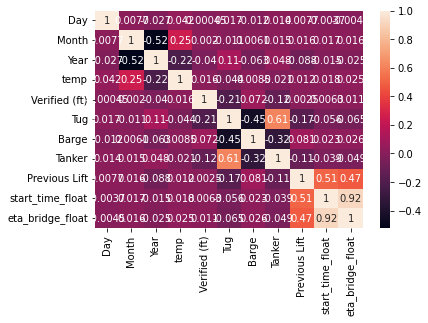

In [57]:
import seaborn as sns
corr = df_model.corr()
sns.heatmap(corr,annot=True)

In [58]:
df_model.drop(columns=['Start Time','ETA Bridge'],inplace=True)

In [59]:
df_model.dtypes

Day                   int64
Month                 int64
Year                  int64
temp                float64
Verified (ft)       float64
Tug                   int32
Barge                 int32
Tanker                int32
Previous Lift         int64
start_time_float    float64
eta_bridge_float    float64
dtype: object

In [60]:
x = df_model.drop(['start_time_float'],axis=1)
#x = np.array(df_model['eta_bridge_float']).reshape(-1,1)
y = df_model['start_time_float']

x.shape,y.shape

((2872, 10), (2872,))

In [61]:
x_train ,x_test, y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state =1)

In [62]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2297, 10), (2297,), (575, 10), (575,))

##### Linear regression

In [63]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
(mse(y_test,y_pred_lr))

3.3872497130346826

In [64]:
lr.score(x_test,y_test)

0.9016106941556846

In [65]:
y_pred_lr,y_test

(array([16.736122  , 21.53176688, 14.56859777, 15.00007762,  6.01220391,
        15.04653734, 10.76956279, 15.95603696, 15.42190238, 12.18863135,
         1.15931785, 22.05823419, 10.23911052, 11.92628861,  6.1156418 ,
         9.00459456, 18.37252463, 10.95072321,  6.134222  , 20.78589866,
         5.90979849, 10.41744595, 20.69596683,  5.3967036 ,  5.5152486 ,
        10.51394395,  8.8565555 ,  2.31217327,  6.41721256, 12.72521958,
        12.62598086, 13.49882927, 13.16625965,  8.10084299, 17.71512584,
        17.47353133, 13.60315577, 15.2214867 , 12.73980413, 14.18335082,
        19.03877087,  2.76253747, 18.36625725, 14.08659621, 13.08039148,
        18.90700699,  9.24848185, 12.66978688, 17.35997809,  7.66280474,
        10.04694073,  2.04873085, 14.79112657,  7.89179263, 13.1234033 ,
        10.13284239, 17.34963769, 13.19183454,  8.69933601, 14.22325758,
        12.93670178,  5.88214313, 10.82706814, 10.61112408, 15.23363482,
         2.27640829,  7.97660075, 10.66604392,  6.0

In [66]:
import statsmodels.api as sm
X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:       start_time_float   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     1178.
Date:                Tue, 15 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:25:42   Log-Likelihood:                -5226.7
No. Observations:                2297   AIC:                         1.048e+04
Df Residuals:                    2286   BIC:                         1.054e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -325.6103    156.400  

In [67]:
# TODO: 
# Update the tide data and concat it with the old tide data
 

# COMPLETE:
#1. Figure out the condition for 2 hr notice column (cut off is 1 hour as per Formula in the Excel Sheet)
#3 Incorporate the weather as a feature (Using df.merge())
#5 Split Vessel(s) columns into 3 different columns (completed)
#2. Split up the datetime in Start datetime into day, month and year
#Clean up Direction column, it seems the predict error is affected whereh OUT is lower than IN.

## Testing Stuff

In [68]:
top_ten_vessel_index = df_time.groupby('Vessel(s)')['Vehicle  ID'].count().sort_values(ascending=False).reset_index().loc[:9,'Vessel(s)'].values
df_time[df_time['Vessel(s)'].isin(top_ten_vessel_index)]

,Vehicle ID,Lift ID,Vessel(s),ETA Bridge,Direction,Email Sent,Advanced Notice,2 Hours Notice?,Start Time,End Time,...,Year,datetime,temp,timehour,Predicted (ft),Verified (ft),Tug,Barge,Tanker,Previous Lift
0,19002,NaN,1 TUG / BARGE,2019-05-06 15:30:00,IN,2019-05-06 05:56:00,9:34,ACCEPTABLE,2019-05-06 15:12:00,2019-05-06 15:30:00,...,2019,2019-05-06,52.4,2019-05-06 15,6.859,7.52,1,1,0,0
1,19002,NaN,1 TUG,2019-05-06 16:30:00,OUT,2019-05-06 05:56:00,10:34,ACCEPTABLE,2019-05-06 16:02:00,2019-05-06 16:20:00,...,2019,2019-05-06,52.4,2019-05-06 16,8.758,9.49,1,0,0,1
2,19002,NaN,1 TUG,2019-05-07 18:30:00,IN,2019-05-07 04:08:00,14:22,ACCEPTABLE,2019-05-07 17:52:00,2019-05-07 18:06:00,...,2019,2019-05-07,60.1,2019-05-07 17,9.066,9.49,1,0,0,0
3,19002,NaN,1 TUG / BARGE,2019-05-07 19:00:00,OUT,2019-05-07 04:08:00,14:52,ACCEPTABLE,2019-05-07 18:25:00,2019-05-07 18:38:00,...,2019,2019-05-07,60.1,2019-05-07 18,9.622,10.07,1,1,0,1
4,19003,NaN,1 TUG / BARGE,2019-05-07 19:45:00,IN,2019-05-07 04:08:00,15:37,ACCEPTABLE,2019-05-07 18:55:00,2019-05-07 19:10:00,...,2019,2019-05-07,60.1,2019-05-07 18,9.622,10.07,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2867,20440,2876.0,3 TUGS / TANKER,2021-08-10 05:35:00,OUT,2021-08-10 05:13:00,0:22,TOO LATE,2021-08-10 05:30:00,2021-08-10 05:45:00,...,2021,2021-08-10,70.5,2021-08-10 05,10.589,11.08,3,0,3,0
2868,20441,2877.0,1 TUG / BARGE,2021-08-10 07:05:00,IN,2021-08-10 05:13:00,1:52,ACCEPTABLE,2021-08-10 06:35:00,2021-08-10 06:52:00,...,2021,2021-08-10,70.5,2021-08-10 06,9.867,10.27,1,1,0,1
2869,20441,2878.0,1 TUG / BARGE,2021-08-10 07:40:00,OUT,2021-08-10 05:13:00,2:27,ACCEPTABLE,2021-08-10 07:19:00,2021-08-10 07:40:00,...,2021,2021-08-10,70.5,2021-08-10 07,8.131,8.38,1,1,0,2
2870,20442,2880.0,1 TUG / BARGE,2021-08-11 20:00:00,OUT,2021-08-11 14:25:00,5:35,ACCEPTABLE,2021-08-11 19:43:00,2021-08-11 19:56:00,...,2021,2021-08-11,82.4,2021-08-11 19,9.503,10.08,1,1,0,0


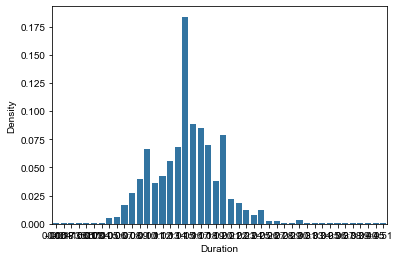

In [69]:
import seaborn as sns
import matplotlib as plt
from matplotlib import rcParams

d = (df_time['Duration'].value_counts()/len(df_time))\
    .reset_index().sort_values('index')
d.rename(columns={'index':"Duration","Duration":"Density"},inplace=True)
sns.barplot(data=d,x='Duration',y='Density',color='tab:blue')
sns.set(rc={'figure.figsize':(20,5)})


In [70]:
df = pd.read_csv("Chelsea Data Fix.csv", encoding= 'unicode_escape',skiprows=1)
df = df.loc[:, ['Vehicle  ID', 'Lift ID', 'Vessel(s)', 'ETA Bridge', 'Direction',
       'Email Sent', 'Advanced Notice', '2 Hours Notice?', 'Notes',
       'Start Time', 'End Time', 'Duration', 'Direction.1', 'Vessel(s).1']].copy()           

In [71]:
df_time['Total Vessels']=df_time['Tug']+df_time['Barge']+df_time['Tanker']
df_time.loc[:,['Year',"Month",'Day']].head(7)

,Year,Month,Day
0,2019,5,6
1,2019,5,6
2,2019,5,7
3,2019,5,7
4,2019,5,7
5,2019,5,7
6,2019,5,8


In [72]:
df_time['Duration']=pd.to_datetime(df_time['Duration'],errors='coerce')

In [73]:
df_time['Predict Error'] = df_time['Predict Error'].dt.total_seconds()/60

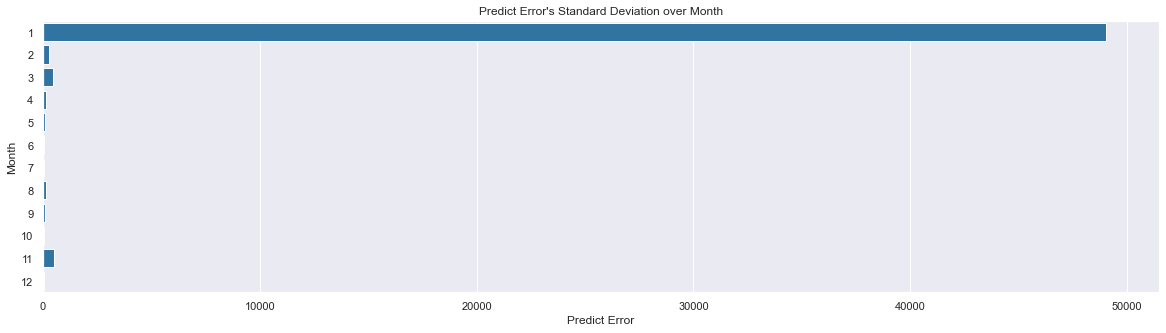

In [74]:
d1 = df_time.groupby('Month')['Predict Error'].std().reset_index()
barp = sns.barplot(data=d1,x='Predict Error',y='Month',color='tab:blue',orient='h')
barp.set(title='Predict Error\'s Standard Deviation over Month')
sns.set(rc={'figure.figsize':(12,5)})

In [75]:
pd.Series(np.where(df_time['ETA Bridge']-df_time['Email Sent']>'01:00:00','Acceptable','Too Late')).value_counts()

Acceptable    2811
Too Late        61
dtype: int64

In [76]:
(df_time['ETA Bridge']-df_time['Email Sent']).describe()

count                          2870
mean      0 days 15:42:32.738675958
std      11 days 19:32:59.147809697
min               -1 days +04:02:00
25%                 0 days 02:51:00
50%                 0 days 04:46:00
75%                 0 days 08:22:45
max               366 days 02:15:00
dtype: object

In [77]:
df_time['2 Hours Notice?'].value_counts()

ACCEPTABLE    2815
TOO LATE        57
Name: 2 Hours Notice?, dtype: int64

In [78]:
np.where(df_time['ETA Bridge']-df_time['Email Sent']>'02:00:00',0,1).sum()

375